In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from sklearn.datasets import load_diabetes

In [47]:
data = load_diabetes()

In [48]:
X = data.data
y = data.target

In [49]:
X.shape

(442, 10)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=0.2)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [52]:
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred  = lr.predict(X_test)

In [54]:
from sklearn.metrics import r2_score,mean_squared_error

In [55]:
print(lr.coef_)
print(lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [56]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [57]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.01)

In [58]:
r.fit(X_train,y_train)

Ridge(alpha=0.01)

In [59]:
print(r.coef_)
print(r.intercept_)

[  26.26181052 -240.39934227  496.57507972  326.6599829  -420.98179086
  137.89180358  -53.05692237  194.22314385  581.45028172   94.31369289]
152.08329034119228


In [60]:
y_pred = r.predict(X_test)

In [61]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5230847087541542
RMSE 48.510284264409194


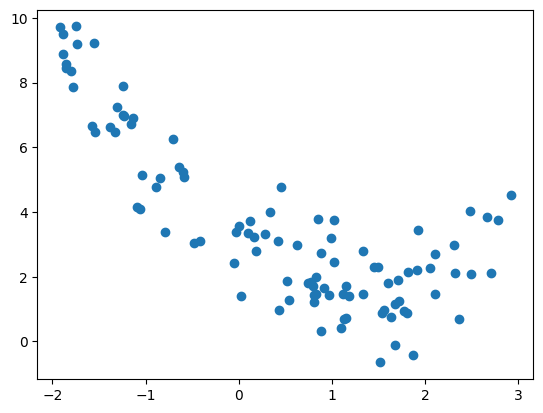

In [62]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

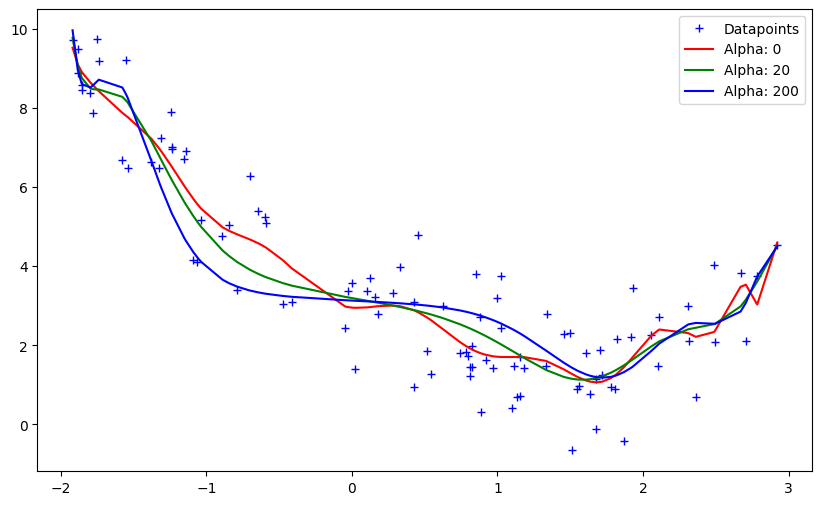

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()